In [ ]:
student_name = "Your Name Here"
student_id = "Your ID Here"

In [22]:

# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# load libraries from scikit-learn for model creation and testing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Familiarize yourself with the IRIS flower dataset

Practical Week 5
The goal this week is to look at some simple data and get to grips with what approach you could take in predictive modelling based on your objective and the shape and format of the data set you are looking at.

The handout that accompanies this practical is scikit-learn algorithm cheat -sheet from Andreas Mueller (http://peekaboo-vision.blogspot.com.au/2013/01/machine-learning-cheat-sheet-for-scikit.html)

Understanding the shape of the data and the approach to analysis is what we will look. The steps in a Data Science Modelling project are

1. Define Problem <br>
2. Prepare Data<br>
3. Evaluate Algorithms<br>
4. Improve Results<br>
5. Present Results<br>


We will work with the IRIS dataset to evaluate alternative methods of modelling with the scikit-learn module. The iris dataset is a classic and very easy multi-class classification dataset desscribing different attributes of the irises’ (flowers).  You can read much more about it on scikit-learn website or on wikipedia.

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

https://en.wikipedia.org/wiki/Iris_flower_data_set

# 1. Define Problem

The problem is to determine what class a flower comes from based on the variables : <br>
<br>
Sepal Length <br> 
Sepal Width <br>
Petal Length <br> 
Petal Width <br>  .

The iris dataset is a classic and very easy multi-class classification dataset desscribing different attributes of 3 different types of irises’ (Setosa, Versicolour, and Virginica). The dataset is constructured in standard rows being the samples and standard  columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.  

There are four features measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features different models can be applied to distinguish the species from each other.  

In [3]:
# Load dataset

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Describe the data  

In [4]:
# insert code here
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# class distribution, the samples per class 

print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


Visualize it using a Seaborn (sns) box plot 

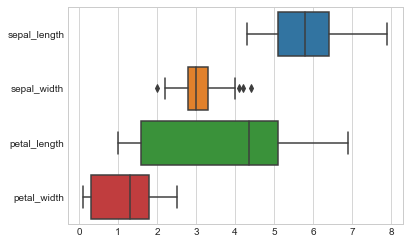

In [5]:
# insert code here
sns.set_style('whitegrid')
sns.boxplot(data=iris, orient="h");

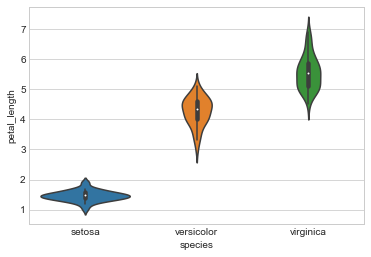

In [6]:
sns.violinplot(x=iris.species, y=iris.petal_length)

AttributeError: module 'seaborn' has no attribute 'plt'

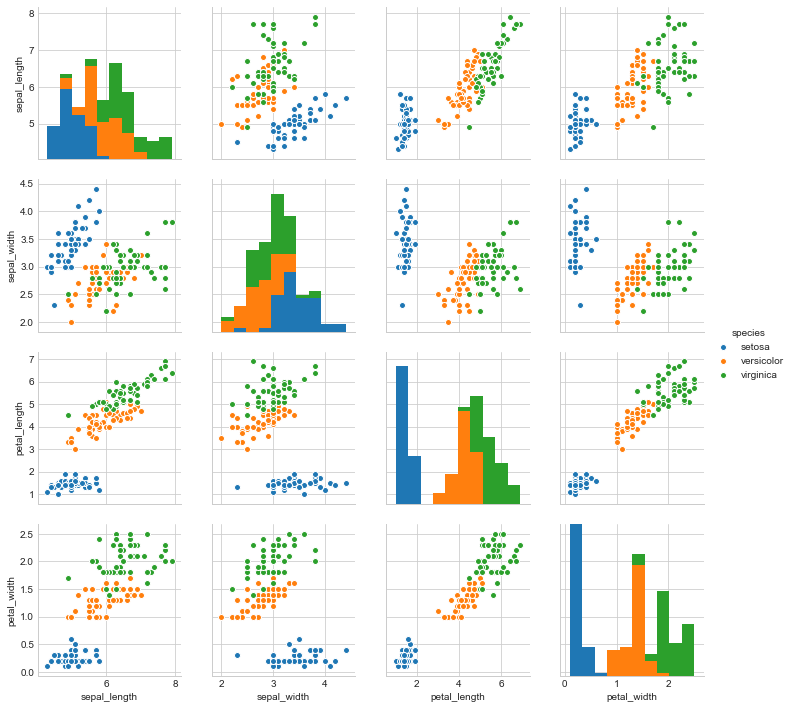

In [7]:
# Quick plot of the data using seaborn
  
 
sns.pairplot(iris, hue="species")
sns.plt.show()

This shows us that the species are quite well separated into clusters based on their measurements. This is the case with all the combinations except when plotting sepal length and sepal width. These are slightly more difficult to separate. Whilst the Setosa species in this graph is less clustered as it’s other graphs, Versicolor and Virginica are quite well mixed together here making it much more difficult to tell one group from the other individually.​


We can deduce from these plot table that on average, Setosa petal lengths and widths are much smaller than that of Versicolor and Virginica. Though Virginica do have the biggest petal dimensions on average. We can see that on average, the sepal lengths are quite close in size, however, Setosa have noticeably bigger sepal widths than the other species. These plots tells us that the Setosa species have some distinctive features. 

You can see a pretty strong linear relationship between petal_length and petal_width. 

So next fit a linear regression on petal_length and petal_width. 

# 2. Evaluate using a regression model
 
Use statsmodel to do a OLS linear regression 

In [10]:
# A Linear Regression model for the IRIS data
# insert code here
X = iris["petal_length"]
X = np.vander(X, 2) # add a constant row for the intercept
y = iris["petal_width"] 

# Note the swap of X and y

model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Sat, 16 Sep 2017   Prob (F-statistic):           4.68e-86
Time:                        18:47:06   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4158      0.010     43.387      0.0

# 3. Evaluate using a predictive model
Create a model of the data and estimate their accuracy on unseen data. In this example we are going to use the nearest neighbour algorithm (KNN).
    
    Understand the Algorithm.
    Separate out a validation dataset.
    Set-up the test harness to use 10-fold cross validation.
    Build a KNN model to predict species from flower measurements 


# What is the KNN algorithm ?

The k-nearest neighbors algorithm is based around the simple idea of predicting unknown values by matching them with the most similar known values.  It is commonly used in movie and shopping websites such as Netflix  to predict the nearest neighbour to a value you are trying to predict.  

The number of neighbors we use for k-nearest neighbors (k) can be any value less than the number of rows in the dataset. In practice, looking at only a few neighbors makes the algorithm perform better, because the less similar the neighbors are to our data, the worse the prediction will be.
 
 Before we can predict using KNN, we need to find some way to figure out which data rows are “closest” to the row we’re trying to predict on.

A simple way to do this is to use Euclidean distance
 
$$ \sqrt{(q_1-p_1)^2+ (q_2-p_2)^2 + ... + (q_n-p_n)^2}$$ 

# Create a Validation Dataset

Aim is to use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [20]:
 # columns for training
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data = iris[names]
# get the class labels - the result we are predicting
labels = iris['species']

# split into training and test sets
data_train, data_test, label_train, label_test = model_selection.train_test_split(data, labels, test_size=0.2)

data_test.shape, label_test.shape, data_train.shape, label_train.shape

((30, 4), (30,), (120, 4), (120,))

You now have training data in the data_train and label_train for preparing models and a data_test and label_test sets that we can use later.

## Train and Test a Predictive Model

We can now train a predictive model on the data and then use that to make predictions from our test data.  In this example we'll use the K Nearest Neighbours algorithm. 

In [23]:
model = KNeighborsClassifier()
model.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

We can now evaluate the performance of the trained model.  In the first instance we will test using the same data we trained with.  This is known as a **closed test** and is not the most valid test since we would expect the model to fit this data well.

We use the predict method to generate predictions from the model for the training data.  Then we use [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)  to display the accuracy of the model.

In [24]:
print("Performance on training data")
predictions = model.predict(data_train)
print("Accuracy: ", accuracy_score(label_train, predictions))

Performance on training data
Accuracy:  0.958333333333


A confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making  

|  | event | no-event   |
|------|------|------|
|event| true positive | false positive| 
|no-event| false negative | true negative|  

You can create a confusion matrix with the [sklearn confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function.

In [25]:
print("Confusion Matrix:\n", confusion_matrix(label_train, predictions))

Confusion Matrix:
 [[39  0  0]
 [ 0 36  3]
 [ 0  2 40]]


Finally we can use the [classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a report including the [precision, recall and F1 score](https://en.wikipedia.org/wiki/Precision_and_recall) for these results.  

- **Precision**: proportion of predictions that are correct
- **Recall**: proportion of true labels that are included in the predictions
- **F1 Score**: the harmonic mean of precision and recall

In [28]:
print(classification_report(label_train, predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        39
 versicolor       0.95      0.92      0.94        39
  virginica       0.93      0.95      0.94        42

avg / total       0.96      0.96      0.96       120



### Evaluation on the Test Data

The right way to evaluate a model is using data that has not been used to train it. This is why we split the data into training/testing data earlier.   The test data is designed to represent a sample from the broader population of observations and so give us an idea of how well the model will perform on unseen data in general.  

Repeat the evaluation above on the test data.

**Checkpoint for this week** show the accuracy of the model on the test data.

In [29]:
# repeat the evaluation using the test data 
print("Performance on training data")
predictions = model.predict(data_test)
print("Accuracy: ", accuracy_score(label_test, predictions))

Performance on training data
Accuracy:  1.0
